# Lecture 12: Derivatives and differential equations

## Recap

-   We discussed the concept of **rate of change**

    -   speed is the rate of change of distance;

    -   instantaneous speed is the limit of average speeds over shorter and shorter time periods,

	    $$
        \frac{D(t + \mathrm{d}t) - D(t)}{\mathrm{d}t} \text{ as } \mathrm{d}t \to 0;
        $$

    -   instantaneous rate of change as the limit of

	    $$
        \frac{(\text{value at time } t + \mathrm{d}t) - (\text{value at time } t)}{\mathrm{d}t} \text{ as } \mathrm{d}t \to 0.
        $$

-   We defined the derivative of a function $y(t)$ by

    $$
    y'(t) = \lim_{\mathrm{d}t \to 0} \frac{y(t+\mathrm{d}t) - y(t)}{\mathrm{d}t}.
    $$

-   We saw that speed, $S(t)$, is the derivative of distance covered, $D(t)$:

    $$
    S(t) = D'(t) = \lim_{\mathrm{d}t \to 0}
    \frac{D(t+\mathrm{d}t) - D(t)}{\mathrm{d}t}.
    $$

-   We saw a geometric interpretation of the derivative of $y(t)$ by considering the slope of its graph:

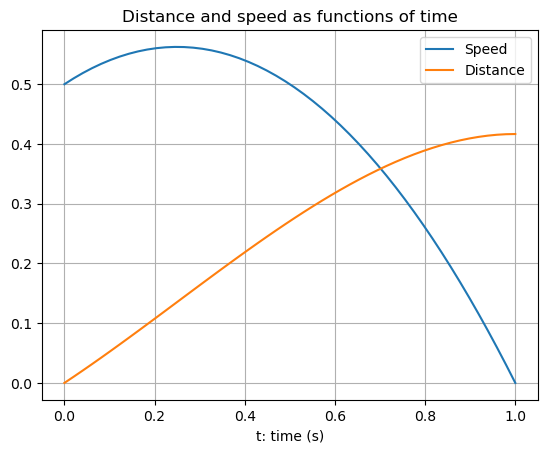

In [1]:
from matplotlib import pyplot as plt
import numpy as np


def D(t):
    return -(t**3) / 3 + t**2 / 4 + t / 2


def S(t):
    return -(t - 1.0) * (t + 0.5)


t = np.linspace(0, 1)
plt.plot(t, S(t), label="Speed")
plt.plot(t, D(t), label="Distance")

plt.title("Distance and speed as functions of time")
plt.xlabel("t: time (s)")
plt.legend()
plt.grid()
plt.show()

-   The slope of the straight line approximation (chord) is

    $$
    \frac{y(t + \mathrm{d}t) - y(t)}{\mathrm{d}t}.
    $$

## Graphs and derivatives

-   We now know a geometric interpretation of the derivative of a function, as being equal to the function's slope at each point.

-   This means we can sketch an approximation to the derivative of any given function.

-   In the following examples, the graph of a function $y(t)$ is given and the graph of $y'(t)$ is then approximated.

### Example 1

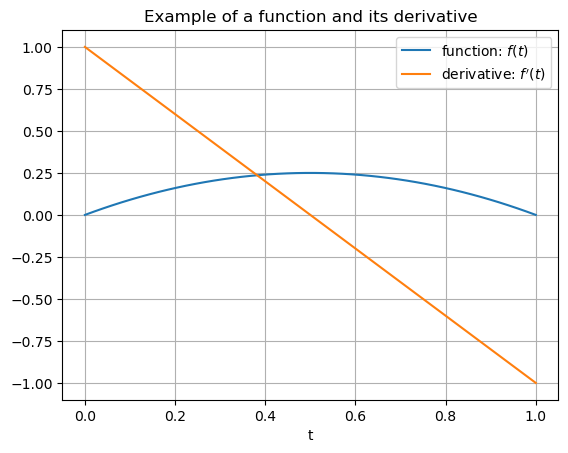

In [2]:
from matplotlib import pyplot as plt
import numpy as np


def f1(x):
    return x * (1.0 - x)


def df1(x):
    return 1.0 - 2.0 * x


t = np.linspace(0, 1)
y = f1(t)
yp = df1(t)

plt.plot(t, y, label="function: $f(t)$")
plt.plot(t, yp, label="derivative: $f'(t)$")

plt.title("Example of a function and its derivative")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

### Example 2

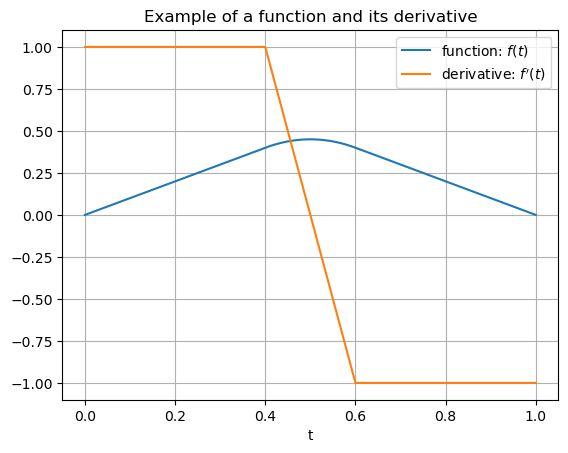

In [3]:
def f3(x):
    if type(x) == np.ndarray:
        return np.array([f3(xx) for xx in x])

    if x < 0.4:
        return x
    if x > 0.6:
        return 1 - x
    return -5 * x**2 + 5 * x - 0.8


def df3(x):
    if type(x) == np.ndarray:
        return np.array([df3(xx) for xx in x])

    if x < 0.4:
        return 1
    if x > 0.6:
        return -1
    return -10 * x + 5


t = np.linspace(0, 1, 1000)
y = f3(t)
yp = df3(t)

plt.plot(t, y, label="function: $f(t)$")
plt.plot(t, yp, label="derivative: $f'(t)$")

plt.title("Example of a function and its derivative")
plt.xlabel("t")
plt.legend()
plt.grid()
plt.show()

### Example 3

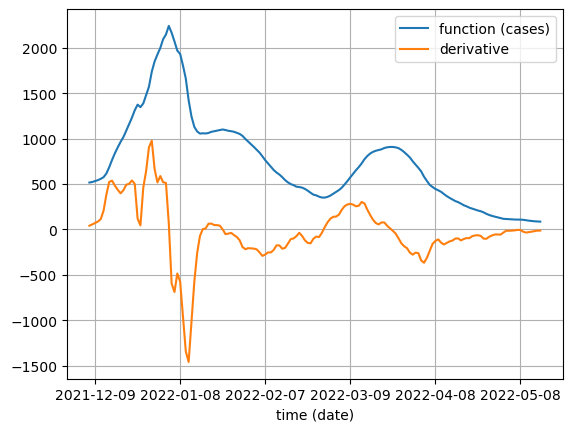

In [4]:
CASES_URL = "https://coronavirus.data.gov.uk/api/v1/data?filters=areaName=United%2520Kingdom;areaType=overview;date%253E2021-12-06&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newCasesBySpecimenDateRollingSum%22:%22newCasesBySpecimenDateRollingSum%22,%22newCasesBySpecimenDateRollingRate%22:%22newCasesBySpecimenDateRollingRate%22,%22newCasesBySpecimenDateChange%22:%22newCasesBySpecimenDateChange%22,%22newCasesBySpecimenDateChangePercentage%22:%22newCasesBySpecimenDateChangePercentage%22%7D&format=csv"

import pandas as pd

df = pd.read_csv(CASES_URL)
df["date"] = pd.to_datetime(df["date"])

dates = df["date"]
cases = df["newCasesBySpecimenDateRollingRate"]


dcases = -np.gradient(cases) * 7

fig, ax = plt.subplots(1, 1)
ax.plot(dates, cases, label="function (cases)")
ax.plot(dates, dcases, label="derivative")
ax.set_xlabel("time (date)")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.legend()
ax.grid()
plt.show()

Rate of cases per 100,000 people in the rolling 7-day period ending on the dates shown.
[Data source, cornavirus.data.gov.uk](https://coronavirus.data.gov.uk/details/cases)

## Differential equations

-   We have already seen that, for speed, $S(t) = D'(t)$.

-   What is the rate of change of speed?

-   Answer: acceleration, $a(t)$ say:

    -   a positive value for $a(t)$ means that speed is increasing whilst a negative value means that speed is decreasing.

-   When a model takes the form of an equation which involves one or more derivatives then it is called a **differential equation**.

-   We have already seen (and computationally solved) a simple example of a differential equation:

    $$
    D'(t) = 1 + 5t - 6t^2
    $$

	where $D(0) = 0$.

-   Most models of dynamic processes take the form of differential equations.

-   The following example uses the fact that the acceleration of an object is equal to the rate of change of its speed:

    -   i.e. $a(t) = S'(t)$.

### An object in free fall

-   Consider a simple model for an object falling from a large height, based on the two following assumptions:

    1.  all objects are attracted downward with an acceleration due to gravity of $9.81 \, \mathrm{m} / \mathrm{s}^2$;

    2.  air resistance causes an object to decelerate in proportion to its speed (i.e., the faster it travels the greater the air resistance).

-   *What is the net acceleration on the object?*

    -   If it is falling with speed $S(t)$ the net acceleration *downwards* is $g - kS(t)$ for some constant $k$.

-   This results in the following differential equation:

    $$
    S'(t) = g - k S(t).
    $$

-   How could we solve this equation?

    -   Recall how we solved $D'(t) = 1 + 5t - 6t^2$?
    -   We can do a similar thing again: divide the time period into lots of small intervals and assume everything is approximately constant on each time interval.

-   We know that

    $$
    S'(t) = \lim_{\mathrm{d}t \to 0} \frac{S(t + \mathrm{d}t) - S(t)}{\mathrm{d}t}
    \approx \frac{S(t+ \mathrm{d}t) - S(t)}{\mathrm{d}t}
    $$

	for a small value of $\mathrm{d}t$.

-   Hence we can say that:

    $$
    S(t + \mathrm{d}t) = S(t) + \mathrm{d}t (g - k S(t)).
    $$

### Python algorithm:

In [5]:
def freefall(n):
    """
    Plot the trajectory of an object falling freely.
    Input: n number of timesteps
    """

    tfinal = 50.0  # Select the final time
    g = 9.81  # acceleration due to gravity (m/s)
    k = 0.2  # air resistance coefficient

    # initialise time and speed arrays array
    t = np.zeros([n + 1, 1])
    s = np.zeros([n + 1, 1])

    # set initial conditions
    s[0] = 0.0
    t[0] = 0.0

    dt = (tfinal - t[0]) / n  # calculate step size

    # take n time steps, in which it is assumed that the acceleration
    # is constant in each small time interval
    for i in range(n):
        t[i + 1] = t[i] + dt
        s[i + 1] = s[i] + dt * (g - k * s[i])

    # plot output
    plt.plot(t, s, label=f"n = {n}")

### Python algorithm: Results

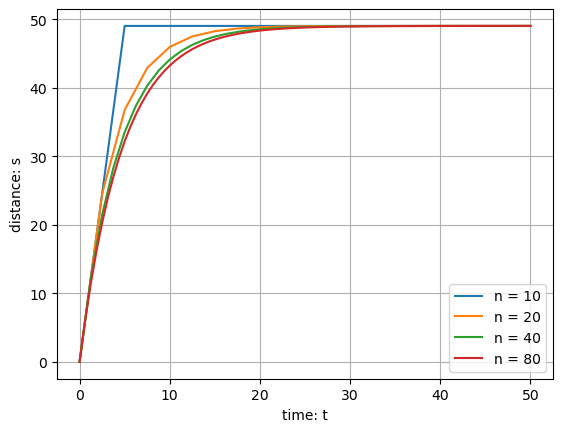

In [6]:
for n in [10, 20, 40, 80]:
    freefall(n)
plt.xlabel("time: t")
plt.ylabel("distance: s")
plt.grid()
plt.legend()
plt.show()

## Euler's method

-   The approach we have used applies for *any* differential equation involving just a single derivative.

-   It is called **Euler's method**.

-   We can always arrange such an equation in the form:

    $$
    y'(t) = f(t, y) \quad \text{ subject to the initial condition } \quad y(t_0) = y_0.
    $$

-   Examples:

    1.  $y'(t) = 1+ 5t - 6t^2$ and $y(0) = 0$.
    2.  $y'(t) = g- ky$ and $y(0) =0$.
    3.  $y'(t) = -y^2 + \frac{1}{t}$ and $y(1) = 2$.

For the general equation we have the following algorithm:

1. Set initial values $t^{(0)}$ and $y^{(0)}$.
2. Loop over all time steps, until the final time, updating using the formulae:

   $$
   \begin{aligned}
   y^{(i+1)} & = y^{(i)} + \mathrm{d}t f(t^{(i)}, y^{(i)}) \\
   t^{(i+1)} & = t^{(i)} + \mathrm{d}t.
   \end{aligned}
   $$

### Example

-   Take three steps of Euler's method to approximate the solution of

    $$
    y'(t) = -y^2 + \frac{1}{t} \text{ subject to the initial condition } y(1) = 2
    $$

	for $1 \le t \le 2$.

-   For this example we have:

    -   $n = 3$
    -   $t_0 = 1$
    -   $y_0 = 2$
    -   $t_{\text{final}} = 2$
    -   $\mathrm{d}t = (2-1)/3 = 1/3$
    -   $f(t, y) = -y^2 + 1/t$.

## Summary

-   Given the graph of $y(t)$ it is possible to sketch the graph of $y'(t)$ (with some care!).

-   Computational models which involve dynamic processes usually involve the use of derivatives.

-   An equation which includes a derivative is known as a **differential equation**.

-   To solve a differential equation it is necessary to know some information about the solution at some starting point (e.g. initial distance travelled, initial speed, population at a given point in time, etc.).

-   One computational approach to solve such equations is **Euler's method** - which gets more accurate with more sub-intervals used.

## Further reading

- Wikipedia: [Differential equations](https://en.wikipedia.org/wiki/Differential_equation)
- Maths is fun: [Differential equations](https://www.mathsisfun.com/calculus/differential-equations.html)

- Wikipedia: [Euler method](https://en.wikipedia.org/wiki/Euler_method)
- x-engineer: [Euler integration method for solving differential equations](https://x-engineer.org/euler-integration/)

Euler's method in films:

- Catherine Meyers, [Exploring the Math in `Hidden Figures'](https://www.insidescience.org/news/exploring-math-hidden-figures), Inside Science, 2017.